#                             Text Analytics Assignment-1

Problem statement: 
Analyze the reviews in the IMDB dataset to perform:
1. Text cleaning - Perform all the steps in text cleaning
2. Text visuals - on the cleaned dataset obtain document detailed inferences for each of the visuals
•	word cloud 
•	bar graph of top 25 unigrams
•	bar graph of top 25 bigrams
•	bar graph of top 25 trigrams
3. Sentiment analysis and sentiment classification - use Vader to tag the sentiment scores as positive/negative
4. document similarity - Find the documents similar to the document with the highest and lowest Vader score


In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHUBHA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Reading csv file
imdb = pd.read_csv("imdb_sentiment.csv")
print(imdb.shape)
imdb.head()


(748, 2)


,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
#Checking for Missing values.
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     748 non-null    object
 1   sentiment  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


1. Text cleaning - Perform all the steps in text cleaning
Preprocessing of Text 
Preprocessing:
   Removing html tags
   Removing Punctuations  
   Performing stemming
   Removing Stopwords
   Expanding contractions etc.


In [5]:
#Function for expanding contractions
import re

def decontracted(phrase):
    
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", "not", phrase)
    phrase = re.sub(r"\'re", "are", phrase)
    phrase = re.sub(r"\'s", "is", phrase)
    phrase = re.sub(r"\'d", "would", phrase)
    phrase = re.sub(r"\'ll", "will", phrase)
    phrase = re.sub(r"\'t", "not", phrase)
    phrase = re.sub(r"\'ve", "have", phrase)
    phrase = re.sub(r"\'m", "am", phrase)
    phrase = re.sub(r"didn", "did not", phrase)
    phrase = re.sub(r"don", "do not", phrase)
    return phrase

In [6]:
#Function for preprocessing the text data.
def preprocess_reviews(review):
    review = re.sub("http\S+", "",review.lower())
    review = BeautifulSoup(review, 'lxml').get_text()
    review = re.sub("[^A-Za-z]+"," ", review)
    review = re.sub("\S*\d\S*", "" , review) 
    #review = decontracted(review)  
    return review


In [7]:
#Applying preprocess funtion on imdb-review data.
imdb['review_clean'] = imdb['review'].apply(preprocess_reviews)
imdb['review_clean'] = imdb['review_clean'].apply(decontracted)
imdb.head()

,review,sentiment,review_clean
0,"A very, very, very slow-moving, aimless movie ...",0,a very very very slow moving aimless movie abo...
1,Not sure who was more lost - the flat characte...,0,not sure who was more lost the flat characters...
2,Attempting artiness with black & white and cle...,0,attempting artiness with black white and cleve...
3,Very little music or anything to speak of.,0,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,the best scene in the movie was when gerardo i...


In [1]:
#Removing stopwords.
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

NameError: name 'nltk' is not defined

In [9]:
#Removing negative words from nltk stopwords list.
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can','see','also','get','will', 'could','would','one','movie','really','just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y','film','even'])

In [10]:
#Removing Stop words

def remove_stop_words(review):
    rstop_words = ""
    for word in review.split():
        if not word in stopwords:
            stop = word
            rstop_words += word
            rstop_words += " "      
    return rstop_words

imdb['review_clean'] = imdb['review_clean'].apply(remove_stop_words)
imdb.head()

,review,sentiment,review_clean
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young ...
1,Not sure who was more lost - the flat characte...,0,not sure lost flat characters audience nearly ...
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keeps runn...


In [11]:
#Lemmatization

def get_lemmatized_text(review):
    lemmatizer = WordNetLemmatizer()
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lem = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(review)]
    res = " ".join(lem)
    return res

imdb['review_clean'] = imdb['review_clean'].apply(get_lemmatized_text)
imdb.head()



,review,sentiment,review_clean
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young man
1,Not sure who was more lost - the flat characte...,0,not sure lost flat character audience nearly h...
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...
3,Very little music or anything to speak of.,0,little music anything speak
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...


2. Text visuals - on the cleaned dataset obtain document detailed inferences for each of the visuals
•	word cloud 
•	bar graph of top 25 unigrams
•	bar graph of top 25 bigrams
•	bar graph of top 25 trigrams


In [12]:
#Joining all the reviews for visuals.
reviews_combinedlemm = " ".join(imdb.review_clean.values)

In [13]:
reviews_combinedlemm

'slow moving aimless distressed drifting young man not sure lost flat character audience nearly half walked attempting artiness black white clever camera angle disappointed became ridiculous acting poor plot line almost non existent little music anything speak best scene gerardo trying find song keep running head rest lack art charm meaning emptiness work guess empty wasted two hour saw today thought good effort good message kid bit predictable loved casting jimmy buffet science teacher baby owl adorable showed lot florida best made look appealing song best muppets hilarious cool right case delivers everything almost right face average acting main person low budget clearly review long overdue since consider tale two sister single greatest ever made put gem term screenplay cinematography acting post production editing directing aspect making practically perfect true masterpiece sea faux masterpiece structure easily tightly constructed history cinema think no something vitally important 

In [14]:
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=50, random_state = 59,stopwords = stopwords).\
generate_from_text(reviews_combinedlemm)

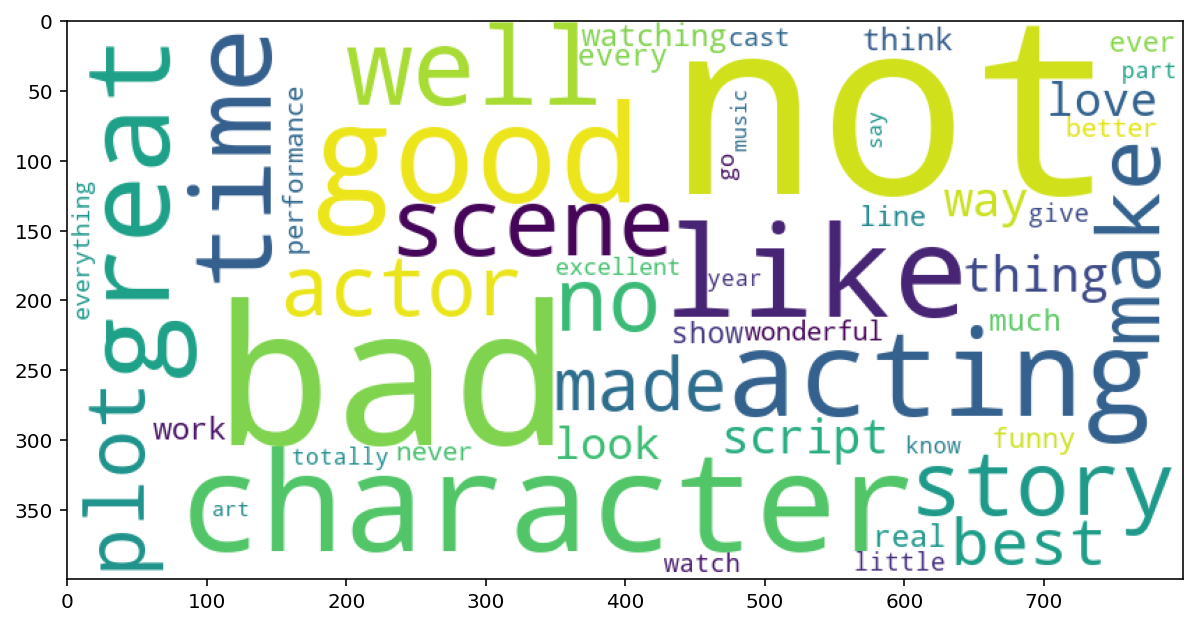

In [15]:
%config InlineBackend.figure_format='retina'
plt.figure(figsize=[10,10])
plt.imshow(word_cloud)
plt.show()

In [16]:
#Plot the bar graph for top 25 frequenctly used unigrams

<AxesSubplot:>

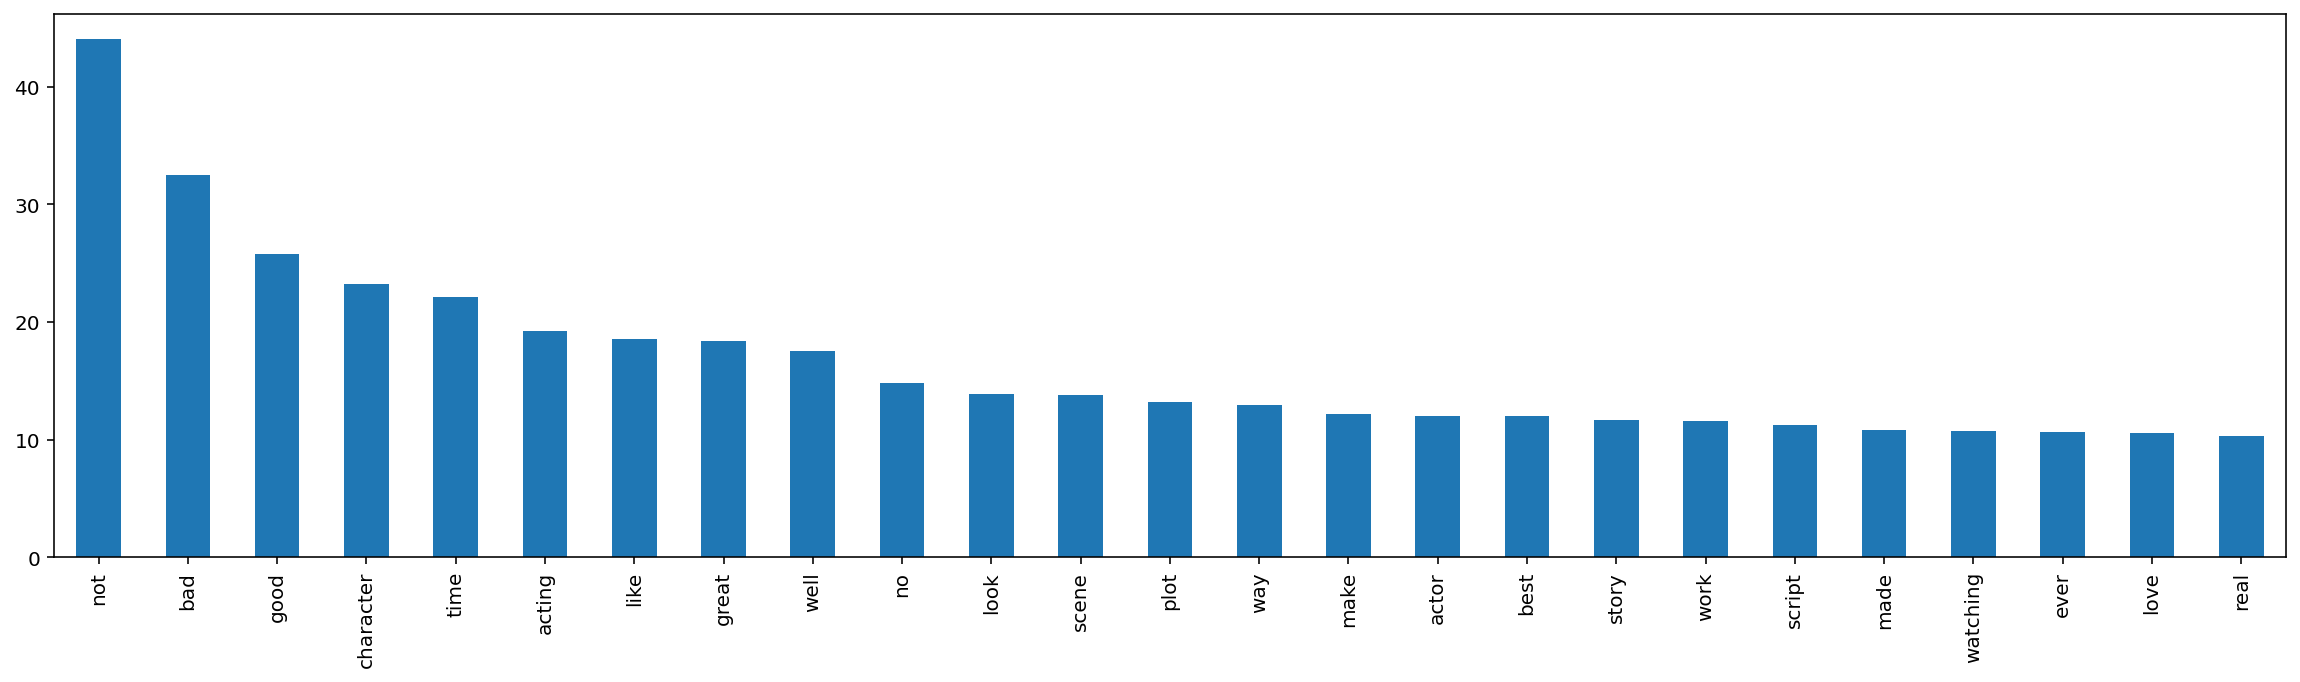

In [17]:
# create a Unigram TFIDF vectorizer object
Unigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1),max_features = 100)
X_tfidfgram = Unigram_tfidf_vectorizer.fit_transform(imdb['review_clean'])
# Creating a DTM
TFidfunigram = pd.DataFrame(X_tfidfgram.toarray(), columns=Unigram_tfidf_vectorizer.get_feature_names())
# Plot bar graph for top 25 frequenctly used unigrams
TFidfunigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

<AxesSubplot:>

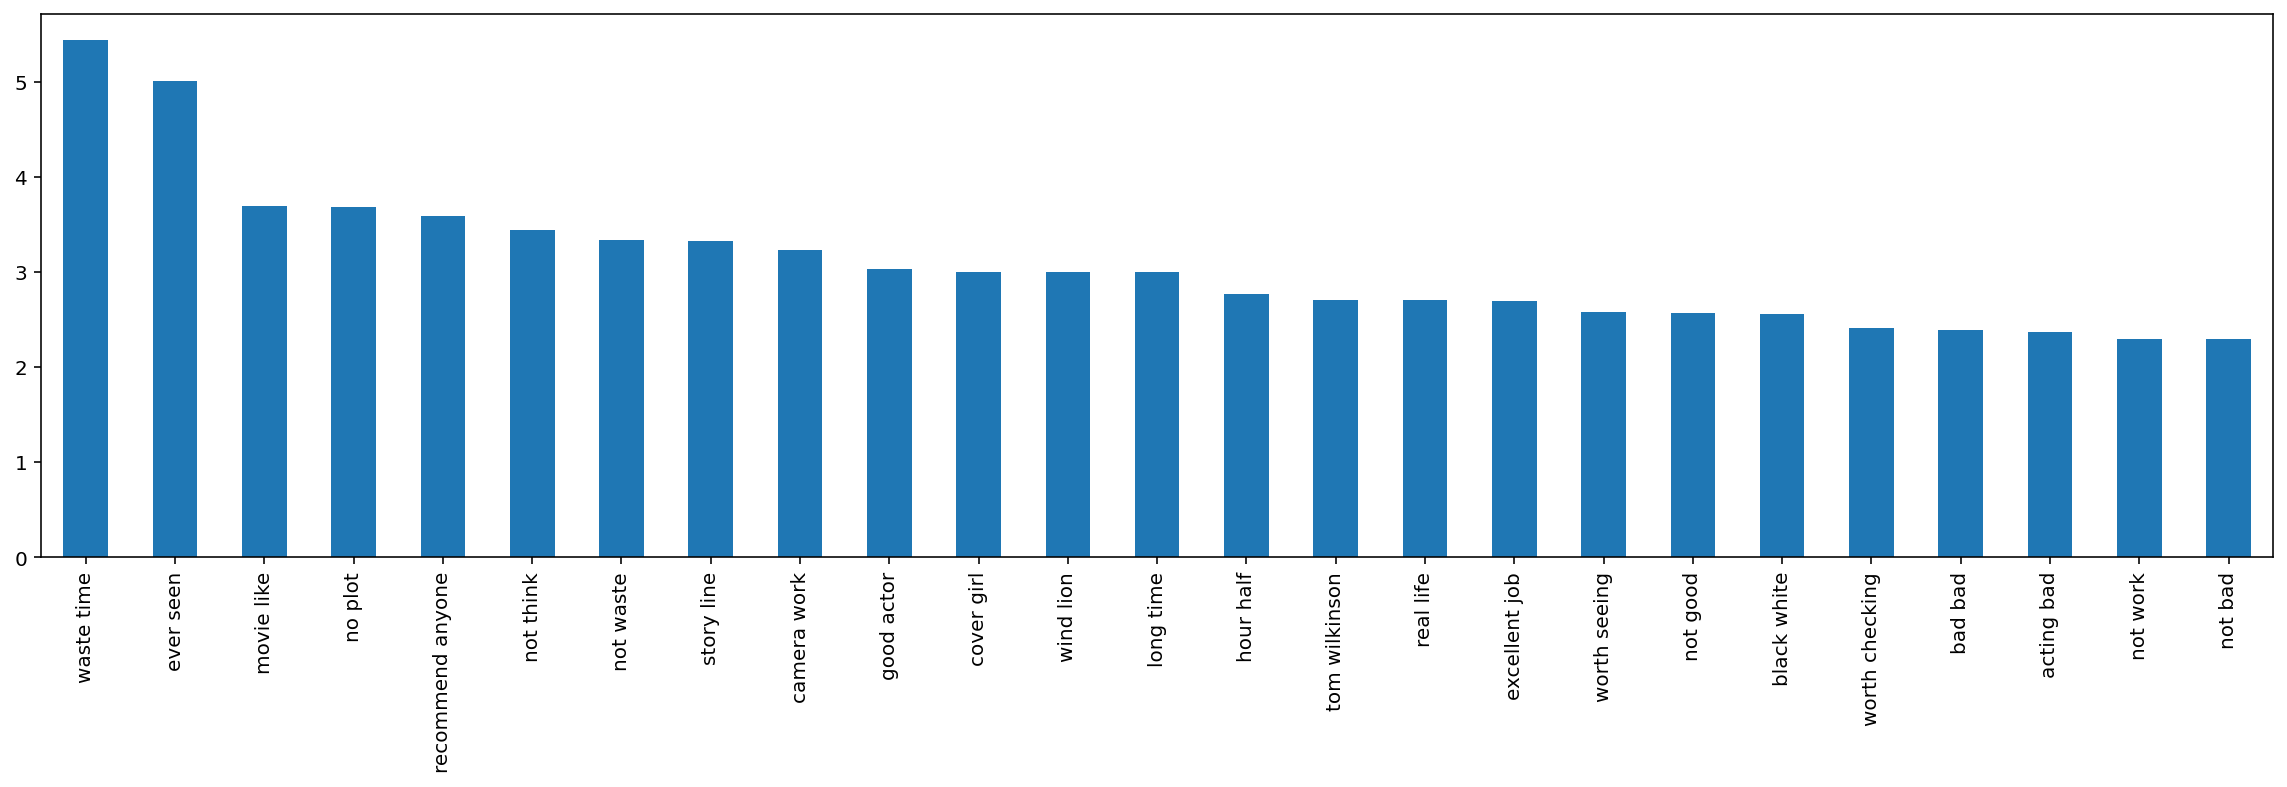

In [18]:
#Plot the bar graph for top 25 frequenctly used bigrams
# create a Bigram TFIDF vectorizer object
Bigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2),max_features = 100)
X_tfidfgram = Bigram_tfidf_vectorizer.fit_transform(imdb['review_clean'])
# Creating a DTM
TFidfBigram = pd.DataFrame(X_tfidfgram.toarray(), columns=Bigram_tfidf_vectorizer.get_feature_names())
# Plot bar graph for top 25 frequenctly used Bigrams
TFidfBigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

<AxesSubplot:>

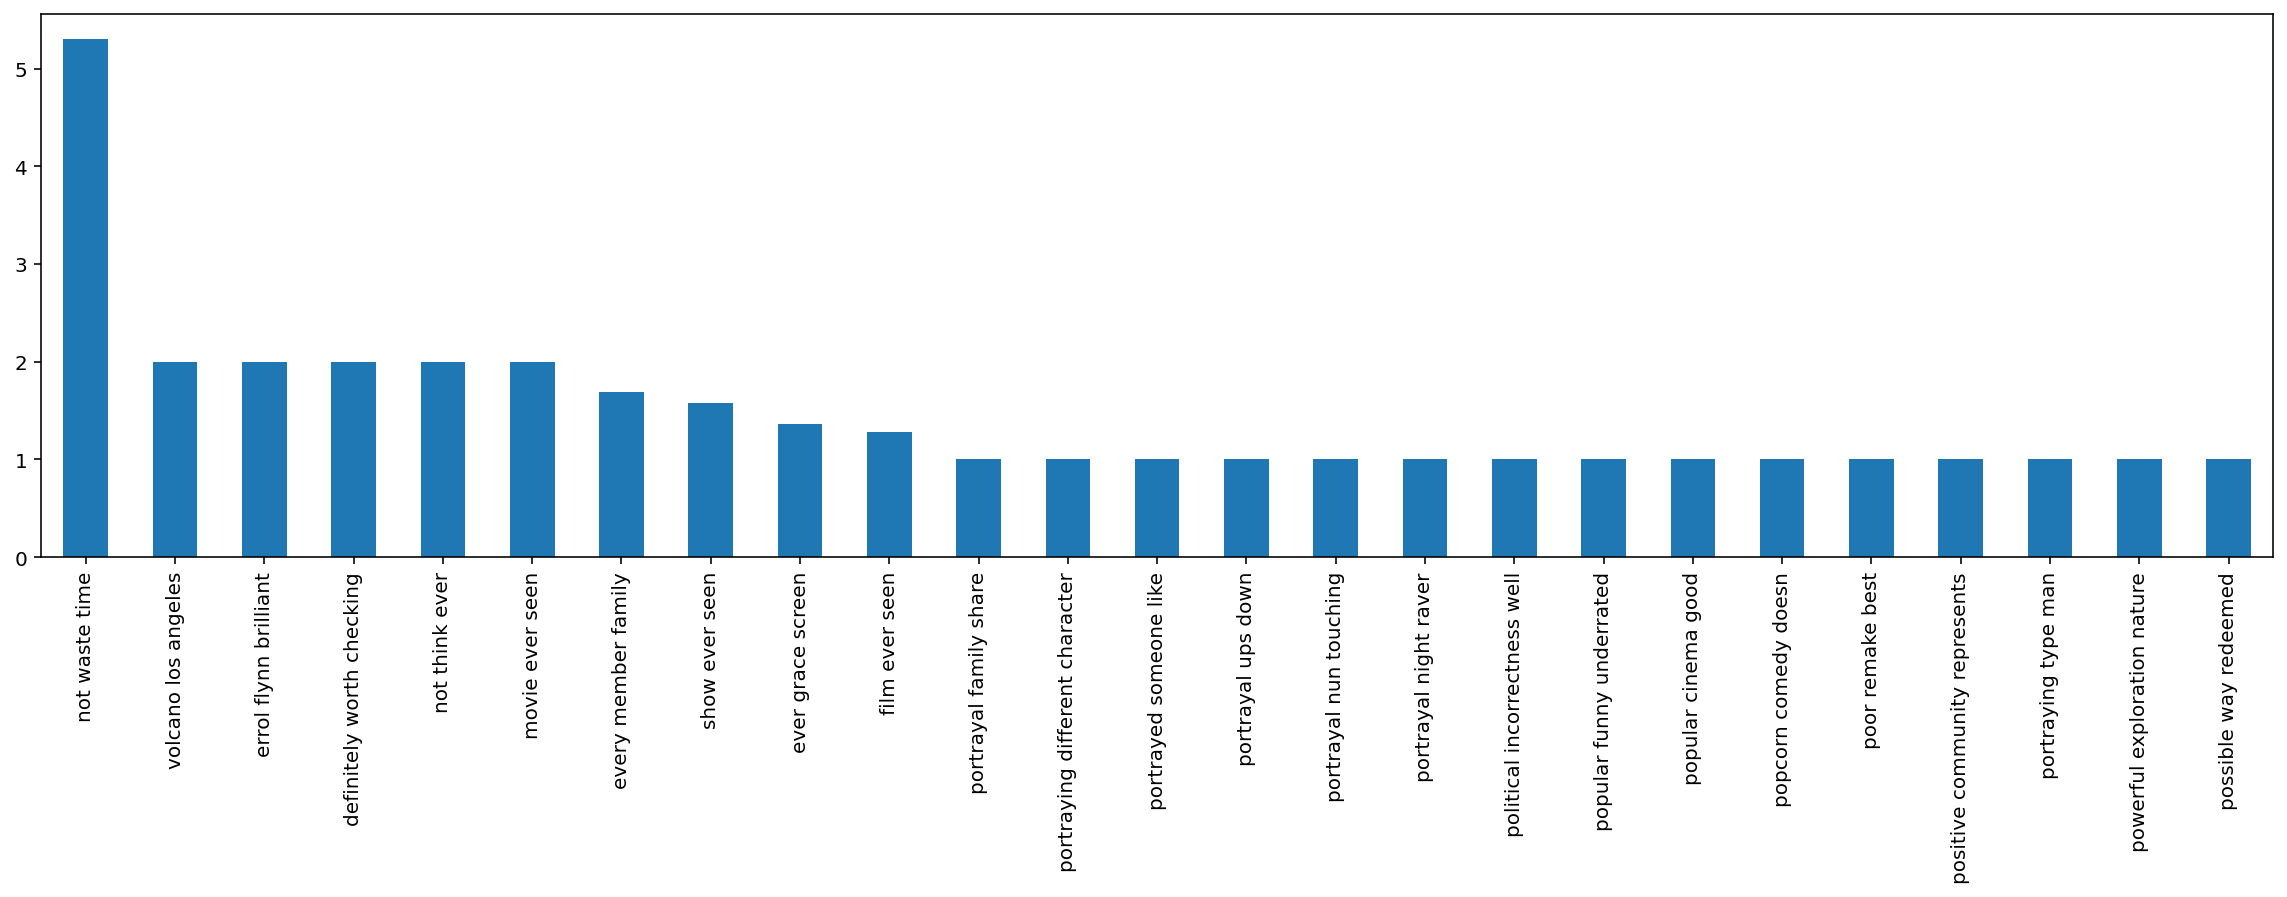

In [19]:
#Plot the bar graph for top 25 frequenctly used Trigrams
# create a Trigram TFIDF vectorizer object
Trigram_tfidf_vectorizer = TfidfVectorizer(ngram_range=(3,3),max_features = 100)
X_tfidfgram = Trigram_tfidf_vectorizer.fit_transform(imdb['review_clean'])
# Creating a DTM
TFidfTrigram = pd.DataFrame(X_tfidfgram.toarray(), columns=Trigram_tfidf_vectorizer.get_feature_names())
# Plot bar graph for top 25 frequenctly used Trigrams
TFidfTrigram.sum().sort_values(ascending=False).head(25).plot.bar(figsize=(20,5)) 

3. Sentiment analysis and sentiment classification - use Vader to tag the sentiment scores as positive/negative

In [20]:
#Sentiment analysis using vader
analyser = SentimentIntensityAnalyzer()

In [21]:
def get_vader_sentiment(sent):
    return analyser.polarity_scores(sent)['compound']

In [22]:
imdb['score_vader'] = imdb.review_clean.apply(get_vader_sentiment)

In [23]:
imdb.head()

,review,sentiment,review_clean,score_vader
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young man,-0.4215
1,Not sure who was more lost - the flat characte...,0,not sure lost flat character audience nearly h...,0.0000
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,-0.6908
3,Very little music or anything to speak of.,0,little music anything speak,0.0000
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...,0.6369


In [24]:
imdb['sent_prediction_vader'] = imdb.score_vader.apply(lambda x:1 if x>0 else 0)
imdb.head(10)

,review,sentiment,review_clean,score_vader,sent_prediction_vader
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young man,-0.4215,0
1,Not sure who was more lost - the flat characte...,0,not sure lost flat character audience nearly h...,0.0000,0
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,-0.6908,0
3,Very little music or anything to speak of.,0,little music anything speak,0.0000,0
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...,0.6369,1
5,"The rest of the movie lacks art, charm, meanin...",0,rest lack art charm meaning emptiness work gue...,-0.5106,0
6,Wasted two hours.,0,wasted two hour,-0.4939,0
7,Saw the movie today and thought it was a good ...,1,saw today thought good effort good message kid,0.7003,1
8,A bit predictable.,0,bit predictable,0.0000,0
9,Loved the casting of Jimmy Buffet as the scien...,1,loved casting jimmy buffet science teacher,0.5994,1


In [25]:
#Accuracy Score
print("Accuracy:",accuracy_score(imdb.sentiment,imdb.sent_prediction_vader))

Accuracy: 0.7767379679144385


In [26]:
#Confusion Matrix:
print("Confusion Matrix:")
confusion_matrix(imdb.sentiment,imdb.sent_prediction_vader)

Confusion Matrix:


array([[285,  77],
       [ 90, 296]], dtype=int64)

In [27]:
#Funcion to assign sentiment scores as positive/negative
def get_sentiment(sent):
    polarity=analyser.polarity_scores(sent)
    if(polarity['compound']>=0):
        return "Positive"
    elif(polarity['compound']<0):
        return "Negative"

In [28]:
imdb['pred_sentiment'] = imdb.review_clean.apply(get_sentiment)
imdb.head()

,review,sentiment,review_clean,score_vader,sent_prediction_vader,pred_sentiment
0,"A very, very, very slow-moving, aimless movie ...",0,slow moving aimless distressed drifting young man,-0.4215,0,Negative
1,Not sure who was more lost - the flat characte...,0,not sure lost flat character audience nearly h...,0.0000,0,Positive
2,Attempting artiness with black & white and cle...,0,attempting artiness black white clever camera ...,-0.6908,0,Negative
3,Very little music or anything to speak of.,0,little music anything speak,0.0000,0,Positive
4,The best scene in the movie was when Gerardo i...,1,best scene gerardo trying find song keep runni...,0.6369,1,Positive


4. document similarity - Find the documents similar to the document with the highest and lowest Vader score

In [29]:
#Hihest Vader score
High_vader = max(imdb['score_vader'])
High_vader = float (str (High_vader)[:-2])
High_vader

0.99

In [30]:
High_vader_df = imdb[['review','review_clean','score_vader']]
High_vader_doc = High_vader_df[High_vader_df.score_vader >= High_vader]
print("Documents similar to the document with the highest vader score:")
High_vader_doc

Documents similar to the document with the highest vader score:


,review,review_clean,score_vader
19,The structure of this film is easily the most...,structure easily tightly constructed history c...,0.9985
136,"In fact, it's hard to remember that the part ...",fact hard remember part ray charles acted not ...,0.9964


In [31]:
#Lowest Vader score
low_vader = min(imdb['score_vader'])
low_vader = float (str (low_vader)[:-3])
low_vader

-0.9

In [365]:
low_vader_df = imdb[['review','review_clean','score_vader']]
low_vader_doc = low_vader_df[low_vader_df.score_vader <= low_vader]
print("Documents similar to the document with the lowest vader score:")
low_vader_doc

Documents similar to the document with the lowest vader score:


,review,review_clean,score_vader
56,Then scene where they debated whether or not t...,scene debated whether not sack trumpeter false...,-0.9325
84,"This movie is a pure disaster, the story is st...",pure disaster story stupid editing worst seen ...,-0.9313
606,The attempts at humor were pitiful and story i...,attempt humor pitiful story awful dosen bear t...,-0.9048
646,"With great sound effects, and impressive spec...",great sound effect impressive special effect r...,-0.9762
722,If you haven't choked in your own vomit by the...,haven choked vomit end cheap drama worthless d...,-0.9300
